In [1]:
# %pip install opencv-python
# %pip install opencv-contrib-python


In [2]:
import cv2
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn import cluster
import time



In [3]:
path = "Dataset_projet_pretraitement_textes_images\Flipkart\Images"
image_paths = glob.glob(os.path.join(path, "*.jpg"))  # prend .jpg, .jpeg, .png
output_path = "Dataset_projet_pretraitement_textes_images\Flipkart\Preprocessed_Images"

print(f"{len(image_paths)} images trouvées")


1050 images trouvées


## Pré-traitement des données

In [4]:
img_treated = []
for img_path in image_paths:
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (256, 256)) #pour mettre toutes les images à la même taille
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #on passe en niveaux de gris
        eq = cv2.equalizeHist(gray) #on augmente le contraste pour faire ressortir les texture sur les images
        img_treated.append(eq)

img_treated = np.array(img_treated)
print(img_treated.shape)

(1050, 256, 256)


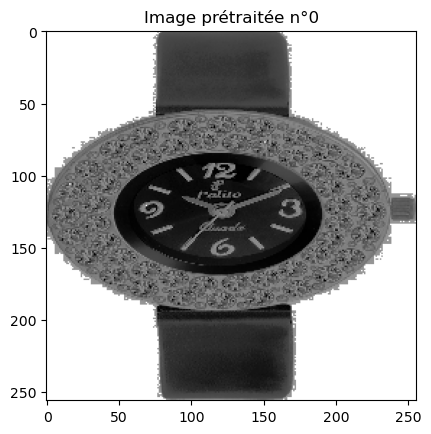

In [5]:
#Pour vérifier mon traitement d'image

plt.imshow(img_treated[0].reshape(256, 256), cmap='gray')
plt.title("Image prétraitée n°0")
plt.show()

## Utilisation de SIFT pour trouver les descripteurs

In [6]:
sift = cv2.SIFT_create()

descriptors_list = []
for eq in img_treated:
    keypoints, descriptors = sift.detectAndCompute(eq, None)
    if descriptors is not None:
        descriptors_list.append(descriptors)

print(len(keypoints))
print(descriptors.shape)


209
(209, 128)


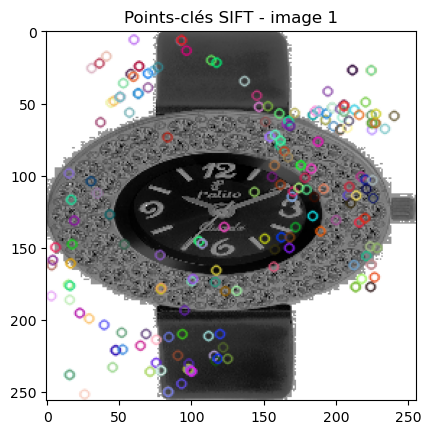

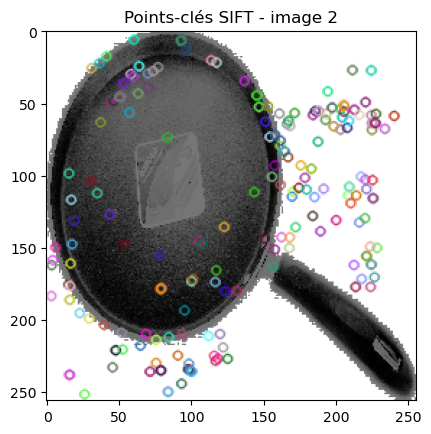

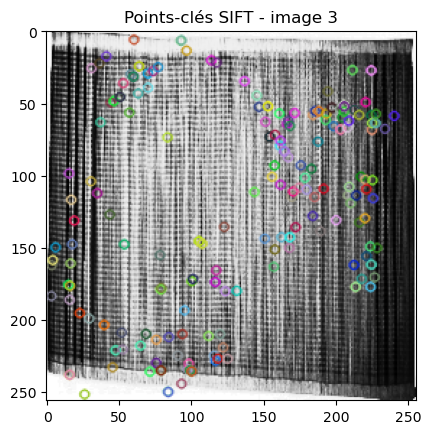

In [7]:
for i in range(3):
    img_kp = cv2.drawKeypoints(img_treated[i], keypoints, None)
    plt.imshow(img_kp, cmap='gray')
    plt.title(f"Points-clés SIFT - image {i+1}")
    plt.show()

## Evaluation de la faisabilité du clustering avec KMeans

In [8]:
all_descriptors = np.concatenate(descriptors_list, axis=0)
print(f"Total descriptors shape: {all_descriptors.shape}")

Total descriptors shape: (423870, 128)


In [9]:
k = int(round(np.sqrt(len(all_descriptors)), 0))
print(f"Nombre de clusters pour KMeans: {k}")
print("Création de",k,"clusters descripteurs SIFT avec KMeans...")

Nombre de clusters pour KMeans: 651
Création de 651 clusters descripteurs SIFT avec KMeans...


In [10]:
temps1 = time.time()

kmeans = cluster.MiniBatchKMeans(n_clusters=k, random_state=0, init_size=3*k)
kmeans.fit(all_descriptors)

,n_clusters,651
,init,'k-means++'
,max_iter,100
,batch_size,1024
,verbose,0
,compute_labels,True
,random_state,0
,tol,0.0
,max_no_improvement,10
,init_size,1953
,n_init,'auto'


In [11]:
duration1=time.time()-temps1
print(f"Temps de traitement kmeans : {duration1:.2f} secondes")

Temps de traitement kmeans : 5.80 secondes


## Etude de faisabilité

In [ ]:
pca_w2v = PCA(n_components=0.99)
pca_result_w2v = pca_w2v.fit_transform(word2vec_df)
print("Variance expliquée :", pca_w2v.explained_variance_ratio_)
print("Variance expliquée cumulée :", pca_w2v.explained_variance_ratio_.sum())

In [ ]:
tsne_w2v = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=30)
tsne_result_w2v = tsne_w2v.fit_transform(pca_result_w2v)

text_df['TSNE1_w2v'] = tsne_result_w2v[:, 0]
text_df['TSNE2_w2v'] = tsne_result_w2v[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1_w2v'], text_df['TSNE2_w2v'], c='purple', alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words - Word2Vec)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(img_treated['TSNE1_w2v'], text_df['TSNE2_w2v'], c=text_df['cat_code'], alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words - Word2Vec)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()